# Introduction

Google Trends gives us an estimate of search volume. Let's explore if search popularity relates to other kinds of data. Perhaps there are patterns in Google's search volume and the price of Bitcoin or a hot stock like Tesla. Perhaps search volume for the term "Unemployment Benefits" can tell us something about the actual unemployment rate? 

Data Sources: <br>
<ul>
<li> <a href="https://fred.stlouisfed.org/series/UNRATE/">Unemployment Rate from FRED</a></li>
<li> <a href="https://trends.google.com/trends/explore">Google Trends</a> </li>  
<li> <a href="https://finance.yahoo.com/quote/TSLA/history?p=TSLA">Yahoo Finance for Tesla Stock Price</a> </li>    
<li> <a href="https://finance.yahoo.com/quote/BTC-USD/history?p=BTC-USD">Yahoo Finance for Bitcoin Stock Price</a> </li>
</ul>

# Import Statements

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
#This is where all the date lotting capabilities live
import matplotlib.dates as mdates

# Read the Data

Download and add the .csv files to the same folder as your notebook.

In [2]:
df_tesla = pd.read_csv('TESLA Search Trend vs Price.csv')

df_btc_search = pd.read_csv('Bitcoin Search Trend.csv')
df_btc_price = pd.read_csv('Daily Bitcoin Price.csv')

df_unemployment = pd.read_csv('UE Benefits Search vs UE Rate 2004-19.csv')

# Data Exploration

### Tesla

**Challenge**: <br>
<ul>
<li>What are the shapes of the dataframes? </li>
<li>How many rows and columns? </li>
<li>What are the column names? </li>
<li>Complete the f-string to show the largest/smallest number in the search data column</li> 
<li>Try the <code>.describe()</code> function to see some useful descriptive statistics</li>
<li>What is the periodicity of the time series data (daily, weekly, monthly)? </li>
<li>What does a value of 100 in the Google Trend search popularity actually mean?</li>
</ul>

In [3]:
tesla_shape = df_tesla.shape
print(f"There are {tesla_shape[0]} rows in the dataframe")
print(f"There are {tesla_shape[1]} column in the dataframe")
df_tesla.columns

There are 124 rows in the dataframe
There are 3 column in the dataframe


Index(['MONTH', 'TSLA_WEB_SEARCH', 'TSLA_USD_CLOSE'], dtype='object')

In [4]:
#This generates a summarization of the descriptive statistics
df_tesla.describe()
print(f'Largest value for Tesla in Web Search: {df_tesla.TSLA_WEB_SEARCH.max()}')
print(f'Smallest value for Tesla in Web Search: {df_tesla.TSLA_WEB_SEARCH.min()}')



Largest value for Tesla in Web Search: 31
Smallest value for Tesla in Web Search: 2


### Unemployment Data

In [5]:
unemployment = df_unemployment.shape
print(f"There are {unemployment[0]} rows")
print(f"There are {unemployment[1]} columns ")
#column names 
df_unemployment.columns

There are 181 rows
There are 3 columns 


Index(['MONTH', 'UE_BENEFITS_WEB_SEARCH', 'UNRATE'], dtype='object')

In [6]:
df_unemployment.describe()
print('Largest value for "Unemployemnt Benefits" '
      f'in Web Search: {df_unemployment.UE_BENEFITS_WEB_SEARCH.max()}')
print('Smallest value for "Unemployemnt Benefits" '
      f'in Web Search: {df_unemployment.UE_BENEFITS_WEB_SEARCH.min()}')

Largest value for "Unemployemnt Benefits" in Web Search: 100
Smallest value for "Unemployemnt Benefits" in Web Search: 14


### Bitcoin

In [7]:
bitcoin_search = df_btc_search.shape

print(f"There are {bitcoin_search[0]} rows")
print(f"There are {bitcoin_search[1]} columns")
df_btc_search.columns


There are 73 rows
There are 2 columns


Index(['MONTH', 'BTC_NEWS_SEARCH'], dtype='object')

In [8]:
df_btc_search.describe()
print(f'largest BTC News Search: {df_btc_search.BTC_NEWS_SEARCH.max()}')
print(f'Smallest BTC News Search: {df_btc_search.BTC_NEWS_SEARCH.min()}')

largest BTC News Search: 100
Smallest BTC News Search: 3


# Data Cleaning

### Check for Missing Values

**Challenge**: Are there any missing values in any of the dataframes? If so, which row/rows have missing values? How many missing values are there?

In [9]:
#dataframe.isna() -> checkes if there are any cells with null/NaN values
#dataframe.isna().values.any() -> returns a boolean answer after checking if there are any null/NaN values
print(f'Missing values for Tesla?: {df_tesla.isna().values.any()} ')
print(f'Missing values for U/E?: {df_unemployment.isna().values.any()}')
print(f'Missing values for BTC Search?: {df_btc_search.isna().values.any()}')

Missing values for Tesla?: False 
Missing values for U/E?: False
Missing values for BTC Search?: False


In [10]:
print(f'Missing values for BTC price?: {df_btc_price.isna().values.any()}')

Missing values for BTC price?: True


In [11]:
#Number of missing values in the bitcoin prices is.
#df_btc_price.isna().values.sum() -> this will check the dataframe for the NaN values and then sum up the number of cells with NaN values
print(f'Number of missing values: {df_btc_price.isna().values.sum()} ')


Number of missing values: 2 


**Challenge**: Remove any missing values that you found. 

In [12]:
#removing values we can use the .dropna() a nd the inplace argument allows to overwrite our Dataframe
df_btc_price.dropna(inplace=True)
#If the answer is now false means the cells were deleted or dropped
(f"Any missing numbers for btc_price:  {df_btc_price.isna().values.any()}")


'Any missing numbers for btc_price:  False'

### Convert Strings to DateTime Objects

**Challenge**: Check the data type of the entries in the DataFrame MONTH or DATE columns. Convert any strings in to Datetime objects. Do this for all 4 DataFrames. Double check if your type conversion was successful.

In [13]:
df_tesla.MONTH = pd.to_datetime(df_tesla['MONTH'])
df_tesla.MONTH.head()


0   2010-06-01
1   2010-07-01
2   2010-08-01
3   2010-09-01
4   2010-10-01
Name: MONTH, dtype: datetime64[ns]

In [14]:
df_unemployment.MONTH = pd.to_datetime(df_unemployment.MONTH)
df_btc_search.MONTH = pd.to_datetime(df_btc_search.MONTH)
df_btc_price.DATE = pd.to_datetime(df_btc_price.DATE)

In [15]:
print(df_btc_price.DATE.head())
print(df_btc_search.MONTH.head())
print(df_unemployment.MONTH.head())

0   2014-09-17
1   2014-09-18
2   2014-09-19
3   2014-09-20
4   2014-09-21
Name: DATE, dtype: datetime64[ns]
0   2014-09-01
1   2014-10-01
2   2014-11-01
3   2014-12-01
4   2015-01-01
Name: MONTH, dtype: datetime64[ns]
0   2004-01-01
1   2004-02-01
2   2004-03-01
3   2004-04-01
4   2004-05-01
Name: MONTH, dtype: datetime64[ns]


### Converting from Daily to Monthly Data

[Pandas .resample() documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.resample.html) <br>

In [16]:
print(df_btc_price.head())
df_btc_monthly = df_btc_price.resample('M', on='DATE').last()
print(df_btc_monthly)

        DATE       CLOSE      VOLUME
0 2014-09-17  457.334015  21056800.0
1 2014-09-18  424.440002  34483200.0
2 2014-09-19  394.795990  37919700.0
3 2014-09-20  408.903992  36863600.0
4 2014-09-21  398.821014  26580100.0
                 DATE         CLOSE        VOLUME
DATE                                             
2014-09-30 2014-09-30    386.944000  3.470730e+07
2014-10-31 2014-10-31    338.321014  1.254540e+07
2014-11-30 2014-11-30    378.046997  9.194440e+06
2014-12-31 2014-12-31    320.192993  1.394290e+07
2015-01-31 2015-01-31    217.464005  2.334820e+07
...               ...           ...           ...
2020-05-31 2020-05-31   9461.058594  2.777329e+10
2020-06-30 2020-06-30   9137.993164  1.573580e+10
2020-07-31 2020-07-31  11323.466797  2.316047e+10
2020-08-31 2020-08-31  11680.820313  2.228593e+10
2020-09-30 2020-09-28  10912.536133  2.122653e+10

[73 rows x 3 columns]


In [17]:
df_btc_yearly = df_btc_price.resample('Y', on='DATE').mean()
print(df_btc_yearly)

                  CLOSE        VOLUME
DATE                                 
2014-12-31   363.693085  2.383690e+07
2015-12-31   272.453381  3.390557e+07
2016-12-31   568.492407  8.592451e+07
2017-12-31  4006.033629  2.382867e+09
2018-12-31  7572.298947  6.063552e+09
2019-12-31  7395.246280  1.673049e+10
2020-12-31  9175.621951  3.130693e+10


# Data Visualisation

### Notebook Formatting & Style Helpers

In [18]:
#create locators for ticks on the time axis
#we need a yearlocator() and a Monthlocator() objects, which will help Matplotlib findd the years and the months.
#Then we also need a DataFormatter(), which will help us specify how we want to display the dates.
years = mdates.YearLocator()
months = mdates.MonthLocator()
years_fmt = mdates.DateFormatter('%Y')

### Tesla Stock Price v.s. Search Volume

**Challenge:** Plot the Tesla stock price against the Tesla search volume using a line chart and two different axes. Label one axis 'TSLA Stock Price' and the other 'Search Trend'. 

Text(0, 0.5, 'Search Trend')

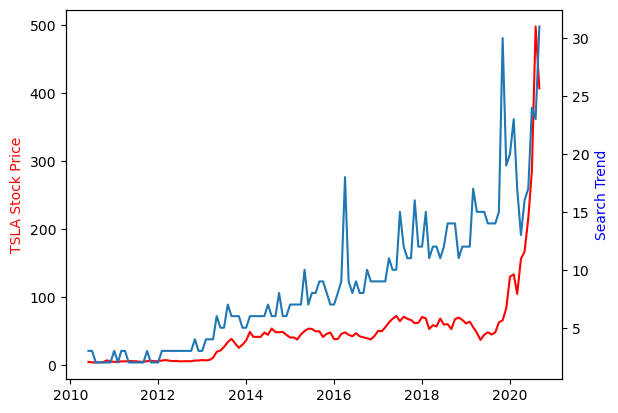

In [19]:
ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.plot(df_tesla.MONTH, df_tesla.TSLA_USD_CLOSE, '#FF0000')
ax2.plot(df_tesla.MONTH, df_tesla.TSLA_WEB_SEARCH)

ax1.set_ylabel('TSLA Stock Price', color='red')
ax2.set_ylabel('Search Trend', color='blue')

**Challenge**: Make the chart larger and easier to read. 
1. Increase the figure size (e.g., to 14 by 8). 
2. Increase the font sizes for the labels and the ticks on the x-axis to 14. 
3. Rotate the text on the x-axis by 45 degrees. 
4. Make the lines on the chart thicker. 
5. Add a title that reads 'Tesla Web Search vs Price'
6. Keep the chart looking sharp by changing the dots-per-inch or [DPI value](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.figure.html). 
7. Set minimum and maximum values for the y and x axis. Hint: check out methods like [set_xlim()](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.set_xlim.html). 
8. Finally use [plt.show()](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.show.html) to display the chart below the cell instead of relying on the automatic notebook output.

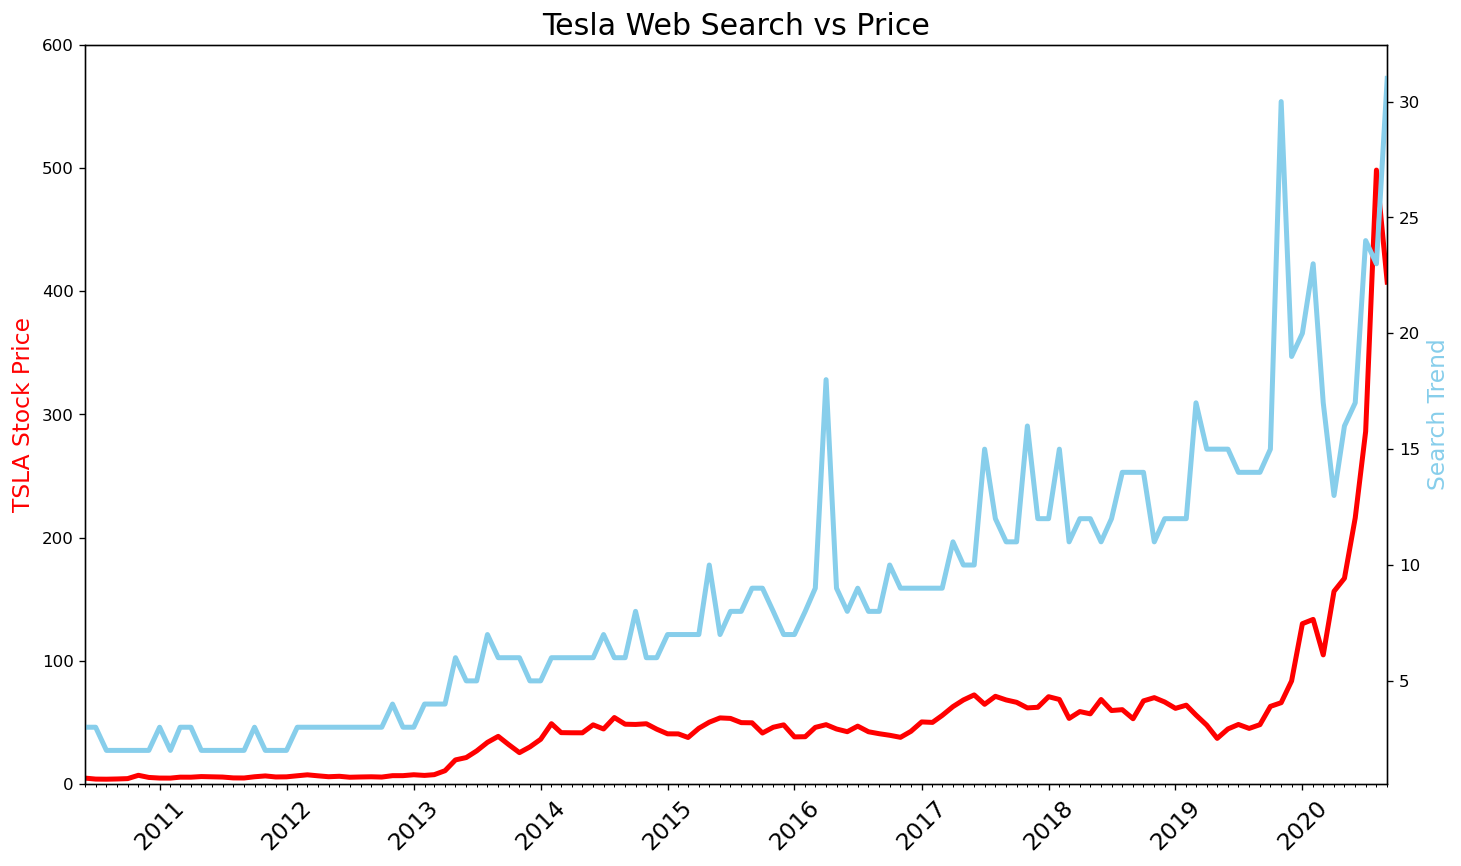

In [21]:
#increase size and resolution
plt.figure(figsize=(14,8), dpi=120)
plt.title('Tesla Web Search vs Price', fontsize=18)
#increase the size and rotate the labels on the x-axis
plt.xticks(fontsize=14, rotation=45)

#increaset fontsize and linewidth for larger charts
ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.set_ylabel('TSLA Stock Price', color='red', fontsize=14)
ax2.set_ylabel('Search Trend', color='skyblue', fontsize=14)

#Set the minimum and maximum values on the axes
ax1.set_ylim([0, 600])
ax1.set_xlim([df_tesla.MONTH.min(), df_tesla.MONTH.max()])

ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

#Experiment with the linestyle and markers
ax1.plot(df_tesla.MONTH, df_tesla.TSLA_USD_CLOSE, color='red', linewidth=3)
ax2.plot(df_tesla.MONTH, df_tesla.TSLA_WEB_SEARCH, color='skyblue', linewidth=3)

plt.show()

### Bitcoin (BTC) Price v.s. Search Volume

**Challenge**: Create the same chart for the Bitcoin Prices vs. Search volumes. <br>
1. Modify the chart title to read 'Bitcoin News Search vs Resampled Price' <br>
2. Change the y-axis label to 'BTC Price' <br>
3. Change the y- and x-axis limits to improve the appearance <br>
4. Investigate the [linestyles](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html ) to make the BTC price a dashed line <br>
5. Investigate the [marker types](https://matplotlib.org/3.2.1/api/markers_api.html) to make the search datapoints little circles <br>
6. Were big increases in searches for Bitcoin accompanied by big increases in the price?

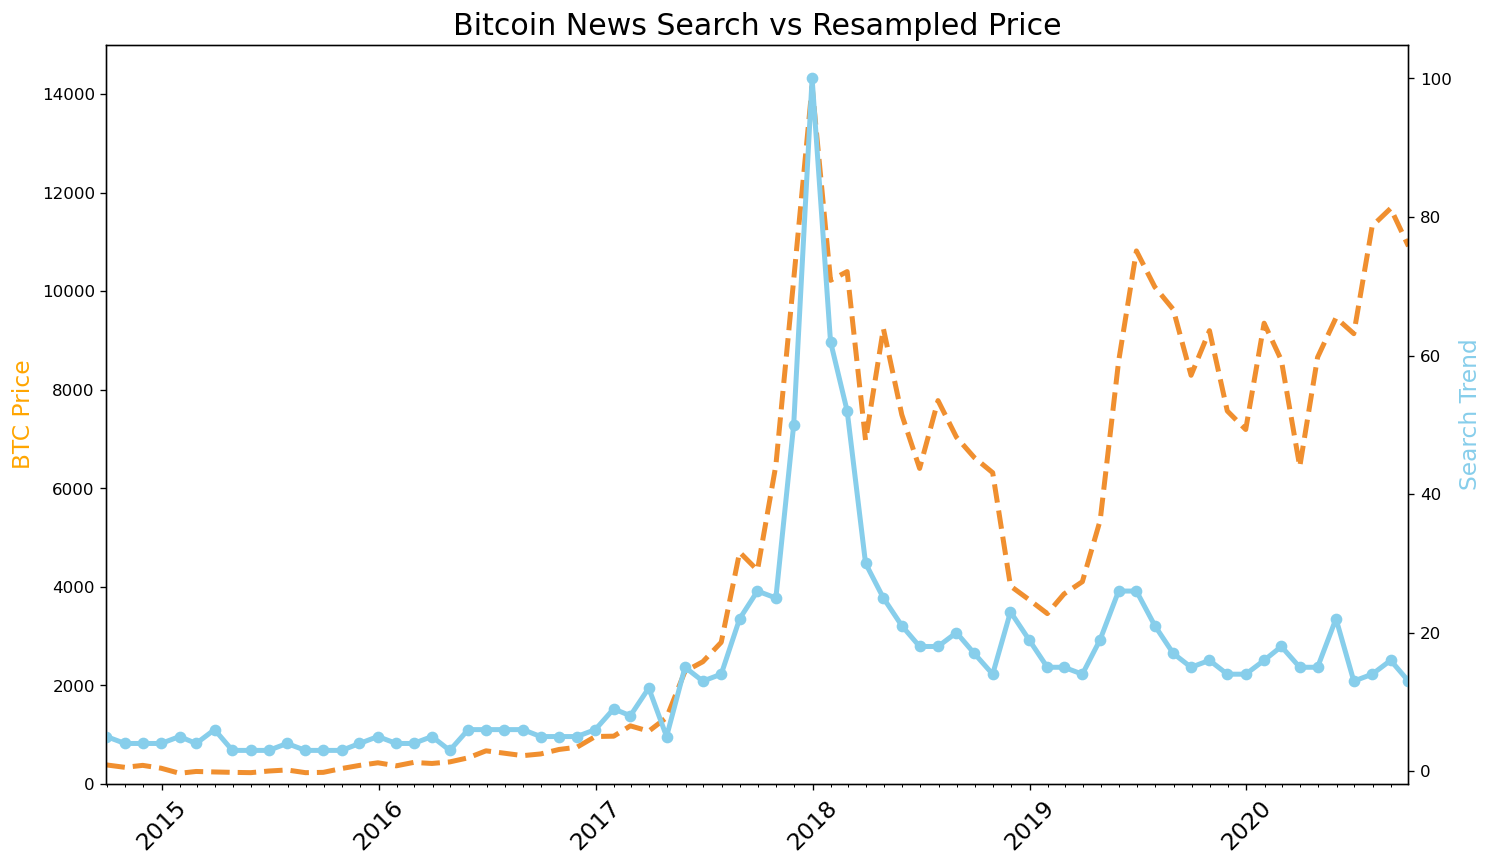

In [24]:
#increase size and resolution
plt.figure(figsize=(14,8), dpi=120)
plt.title('Bitcoin News Search vs Resampled Price', fontsize=18)
#increase the size and rotate the labels on the x-axis
plt.xticks(fontsize=14, rotation=45)

#increaset fontsize and linewidth for larger charts
ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.set_ylabel('BTC Price', color='orange', fontsize=14)
ax2.set_ylabel('Search Trend', color='skyblue', fontsize=14)

ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

ax1.set_ylim(bottom=0, top=15000)
ax1.set_xlim([df_btc_monthly.index.min(), df_btc_monthly.index.max()])

#Experiment with the linestyle and markers
ax1.plot(df_btc_monthly.index, df_btc_monthly.CLOSE, color='#F08F2F', linewidth=3, linestyle='--')
ax2.plot(df_btc_monthly.index, df_btc_search.BTC_NEWS_SEARCH, color='skyblue', linewidth=3, marker='o')

plt.show()

### Unemployement Benefits Search vs. Actual Unemployment in the U.S.

**Challenge** Plot the search for "unemployment benefits" against the unemployment rate. 
1. Change the title to: Monthly Search of "Unemployment Benefits" in the U.S. vs the U/E Rate <br>
2. Change the y-axis label to: FRED U/E Rate <br>
3. Change the axis limits <br>
4. Add a grey [grid](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.grid.html) to the chart to better see the years and the U/E rate values. Use dashes for the line style<br> 
5. Can you discern any seasonality in the searches? Is there a pattern? 

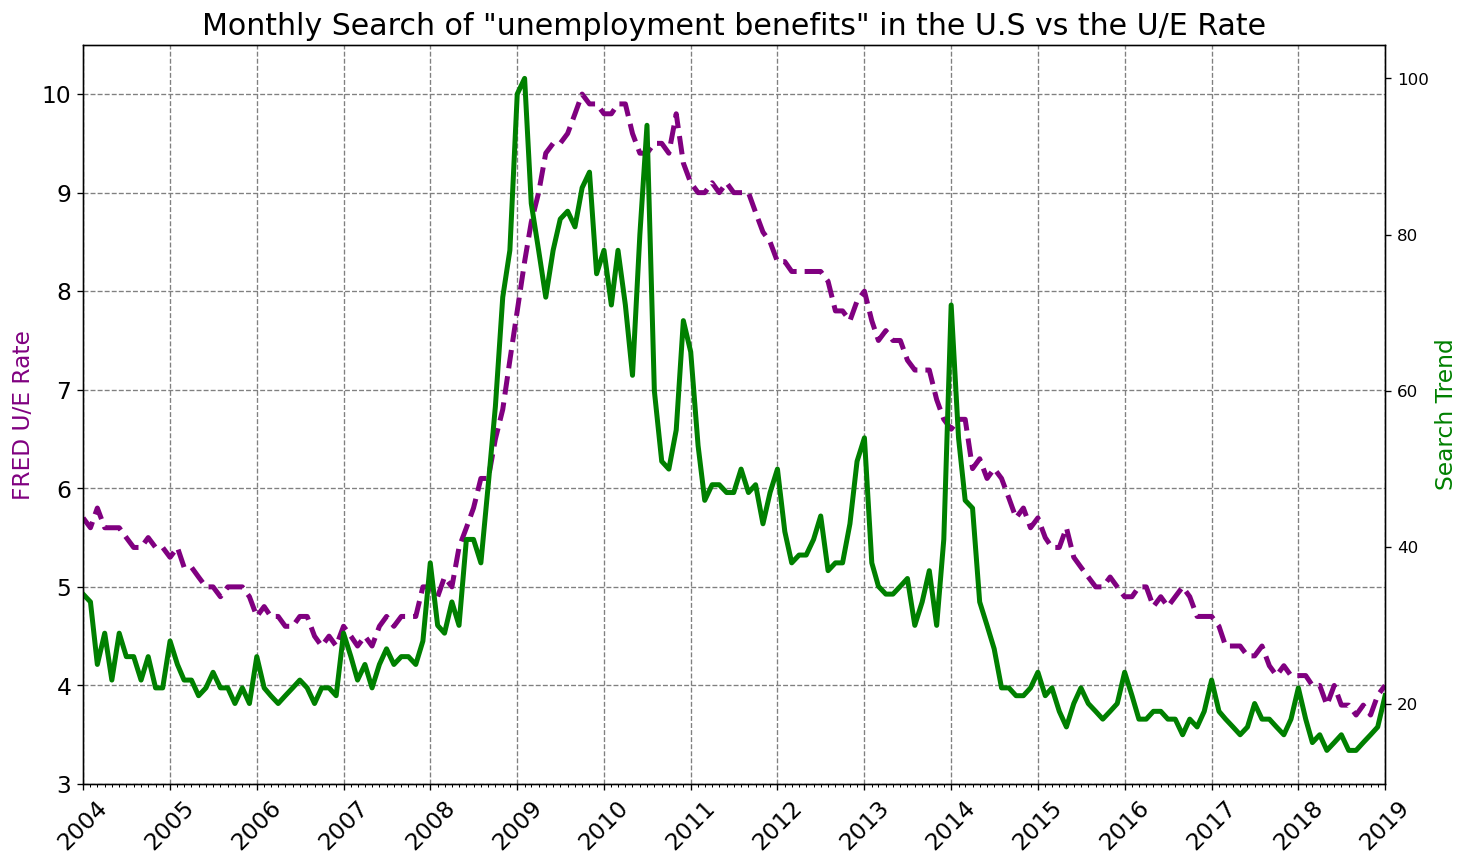

In [22]:
plt.figure(figsize=(14,8), dpi=120)
plt.title('Monthly Search of "unemployment benefits" in the U.S vs the U/E Rate', fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14, rotation=45)

ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.set_ylabel('FRED U/E Rate', color='purple', fontsize=14)
ax2.set_ylabel('Search Trend', color='green', fontsize=14)

ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

ax1.set_ylim(bottom=3, top=10.5)
ax1.set_xlim([df_unemployment.MONTH.min(), df_unemployment.MONTH.max()])

#show thhe grid lines as dark grey lines
ax1.grid(color='grey', linestyle='--')

#Change the dataset used
ax1.plot(df_unemployment.MONTH, df_unemployment.UNRATE, color='purple', linewidth=3, linestyle='--')
ax2.plot(df_unemployment.MONTH, df_unemployment.UE_BENEFITS_WEB_SEARCH, color='green', linewidth=3)

plt.show()


**Challenge**: Calculate the 3-month or 6-month rolling average for the web searches. Plot the 6-month rolling average search data against the actual unemployment. What do you see in the chart? Which line moves first?


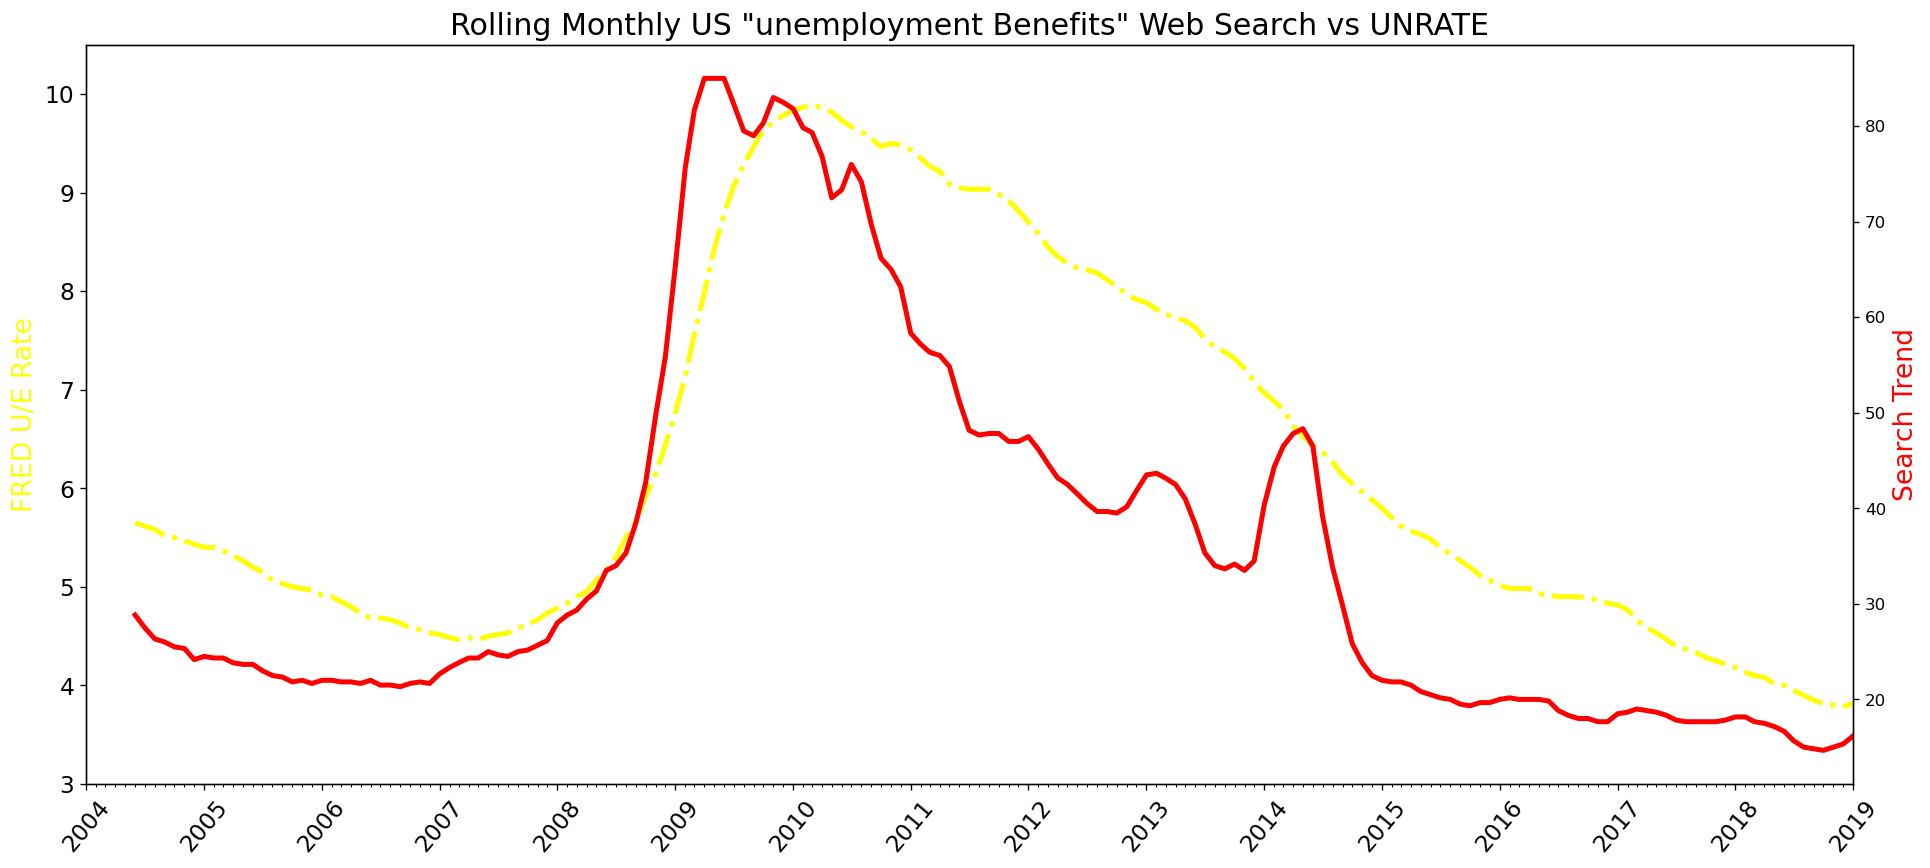

In [25]:
plt.figure(figsize=(19,8), dpi=120)
plt.title('Rolling Monthly US "unemployment Benefits" Web Search vs UNRATE', fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14, rotation=50)

ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

ax1.set_ylabel('FRED U/E Rate', color='yellow', fontsize=16)
ax2.set_ylabel('Search Trend', color='red', fontsize=16)

ax1.set_ylim(bottom=3, top=10.5)
ax1.set_xlim(df_unemployment.MONTH[0], df_unemployment.MONTH.max())

#You can create a rolling average using .rolling()and .mean() functions together
#Calculating the rolling average over a 6 month window
roll_df = df_unemployment[['UE_BENEFITS_WEB_SEARCH', 'UNRATE']].rolling(window=6).mean()

ax1.plot(df_unemployment.MONTH, roll_df.UNRATE, 'yellow', linewidth=3, linestyle='-.')
ax2.plot(df_unemployment.MONTH, roll_df.UE_BENEFITS_WEB_SEARCH, 'red', linewidth=3)

plt.show()

### Including 2020 in Unemployment Charts

**Challenge**: Read the data in the 'UE Benefits Search vs UE Rate 2004-20.csv' into a DataFrame. Convert the MONTH column to Pandas Datetime objects and then plot the chart. What do you see?

In [26]:
df_ue = pd.read_csv("UE Benefits Search vs UE Rate 2004-19.csv")

In [27]:
df_ue.MONTH = pd.to_datetime(df_ue.MONTH)

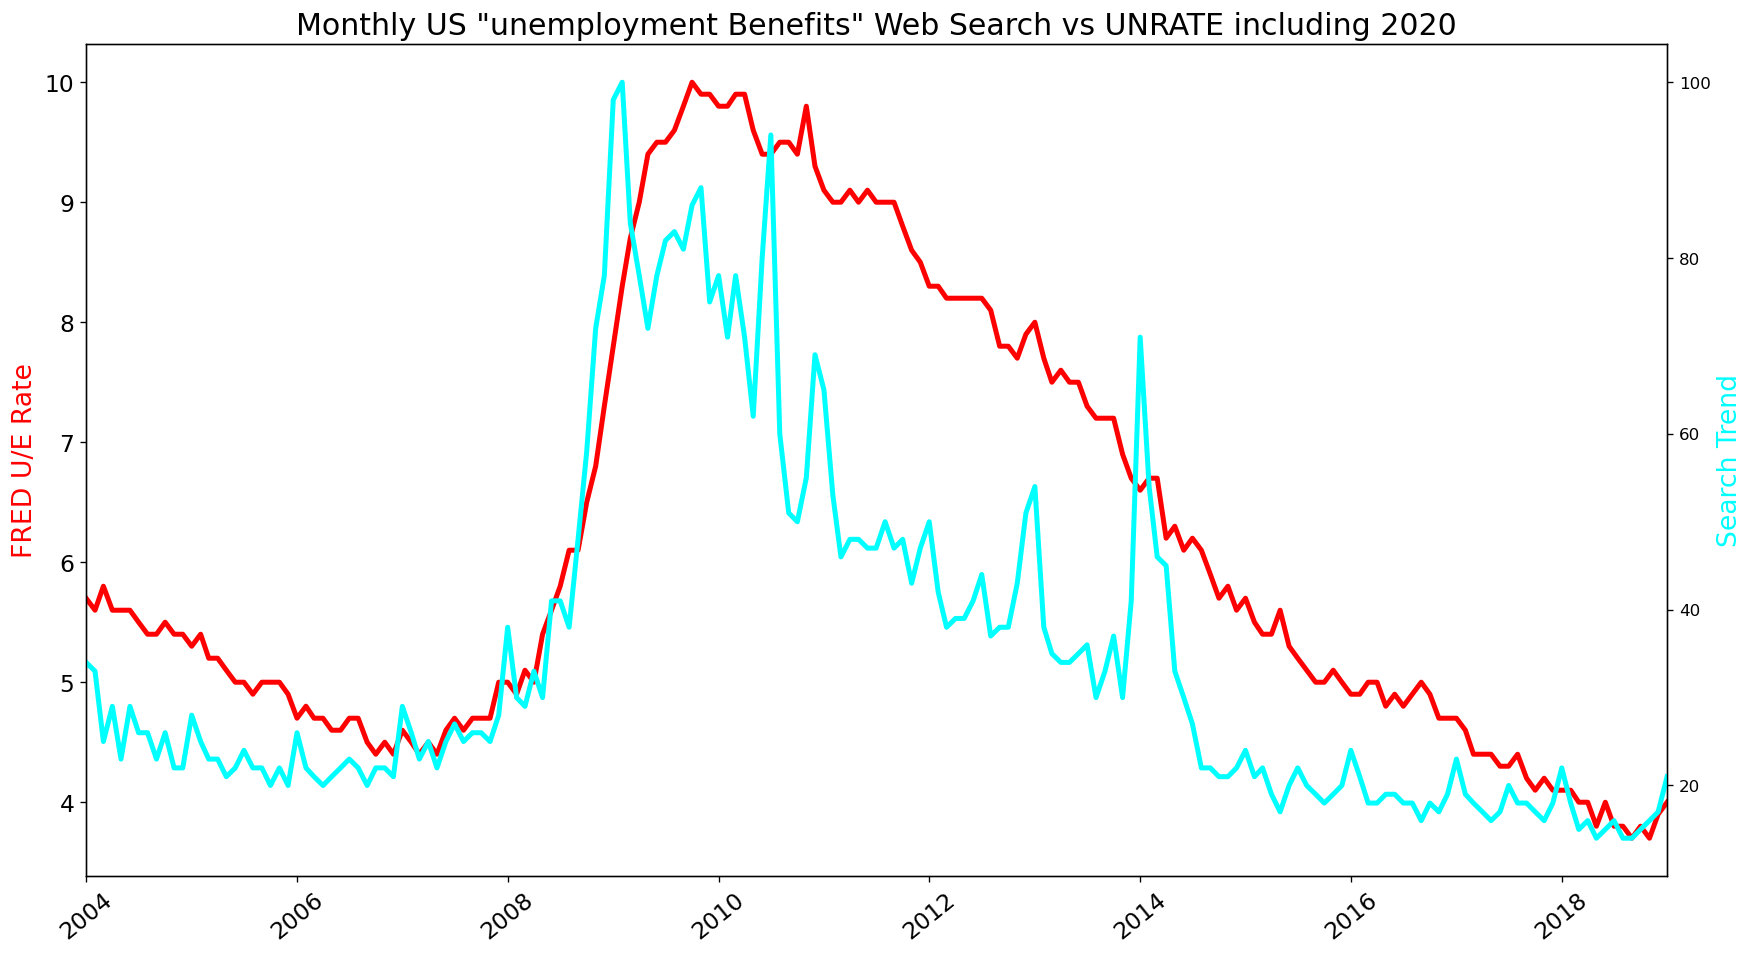

In [32]:
plt.figure(figsize=(17,9), dpi=120)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14, rotation=39)

plt.title('Monthly US "unemployment Benefits" Web Search vs UNRATE including 2020', fontsize=18)

ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.set_ylabel('FRED U/E Rate', color='red', fontsize=16)
ax2.set_ylabel('Search Trend', color='cyan', fontsize=16)

ax1.set_xlim([df_ue.MONTH.min(), df_ue.MONTH.max()])

ax1.plot(df_ue.MONTH, df_ue.UNRATE, 'red', linewidth=3)
ax2.plot(df_ue.MONTH, df_ue.UE_BENEFITS_WEB_SEARCH, 'cyan', linewidth=3)

plt.show()